In [6]:
# Case Study 2: Feature Selection and Regularization

library(ISLR)
data(Credit)
Credit$ID <- NULL
summary(Credit)

# See data dictionary for Credit dataset
# Target var is balance - integer based
# income, limit, rating, cards, age, and education are numeric
# gender, student, married, and ethnicity are categorical


Attaching package: ‘ISLR’


The following object is masked _by_ ‘.GlobalEnv’:

    Credit




     Income           Limit           Rating          Cards      
 Min.   : 10.35   Min.   :  855   Min.   : 93.0   Min.   :1.000  
 1st Qu.: 21.01   1st Qu.: 3088   1st Qu.:247.2   1st Qu.:2.000  
 Median : 33.12   Median : 4622   Median :344.0   Median :3.000  
 Mean   : 45.22   Mean   : 4736   Mean   :354.9   Mean   :2.958  
 3rd Qu.: 57.47   3rd Qu.: 5873   3rd Qu.:437.2   3rd Qu.:4.000  
 Max.   :186.63   Max.   :13913   Max.   :982.0   Max.   :9.000  
      Age          Education        Gender    Student   Married  
 Min.   :23.00   Min.   : 5.00    Male :193   No :360   No :155  
 1st Qu.:41.75   1st Qu.:11.00   Female:207   Yes: 40   Yes:245  
 Median :56.00   Median :14.00                                   
 Mean   :55.67   Mean   :13.45                                   
 3rd Qu.:70.00   3rd Qu.:16.00                                   
 Max.   :98.00   Max.   :20.00                                   
            Ethnicity      Balance       
 African American: 99   Min.   :  

In [ ]:
# Task 1: Consider a data issue
# Identify a variable that may have ethical concerns
# discuss the benefits and concersns related to using this var
# in a business problem
# regardless of concerns use this var is subsequent analyses

# 1 - Pro: var may provide useful info for understanding/predicting
# card balance. the predictive power here may have huge societal benefits

# 2 - con: incorporating ethnicity, a protected class, may be critisized
# on grounds of unfair discrimination and raise legal concerns

# the same considerations apply to gender

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


[1] 90

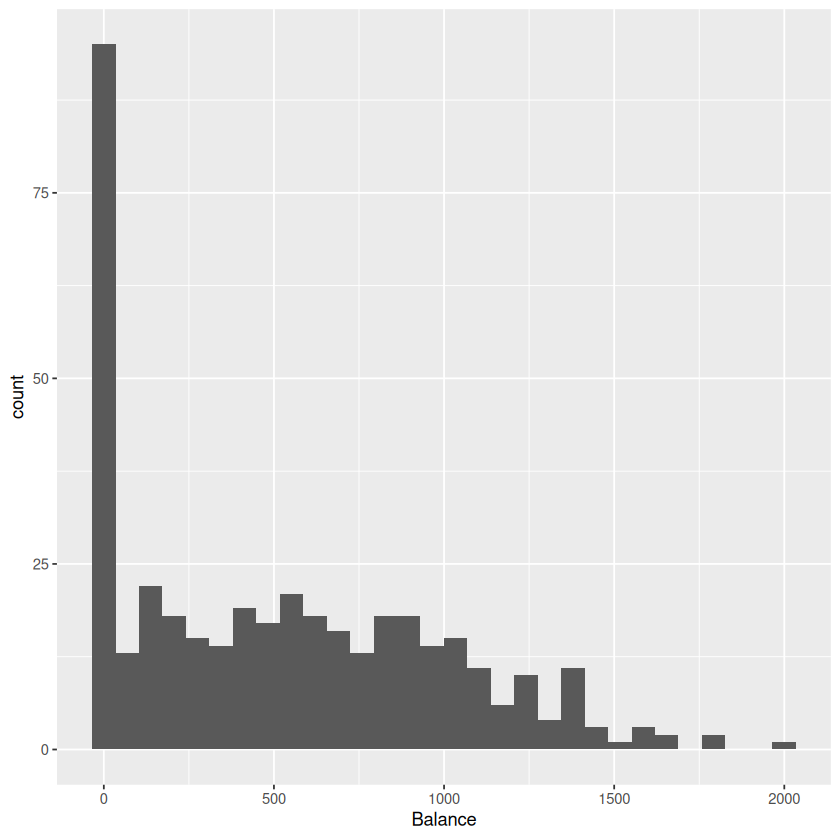

In [8]:
# Task 2:
# a - investigate the distribution of the target var
# b - create a corr matrix for all numerics
# b_i - examine pairwise corr, both in predictors and in rel to target
# b_ii - explain whether it is reasonable to delete Limit.
# -- regardless, delete this for later consideration
# c - create visual representations between numerics and target to find
# -- best predictors

# Note - its generally a good idea to discuss target var distribution
# even when not asked to do so

library(ggplot2)
ggplot(Credit, aes(x = Balance)) +
    geom_histogram()

nrow(Credit[Credit$Balance == 0, ])

# 90 obs have balance = 0
# log transformation should not be used
# since there are no negative values, sqrt() can be used to correct
# skewness

In [9]:
# calculate corr matrix for numerics
cor.matrix <- cor(Credit[, c(1:6, 11)])
print("Correlation Matrix")
round(cor.matrix, digits = 4)

# we make 2 obs:

# 1 - which vars are predictive of balance
# -- limit, and rating are strong
# -- income is moderate
# 2 - High corr b/t vars
# -- b/t income and limit
# -- b/t income and rating
# -- b/t limit and rating
# -- suggests duplication of info and can complicate interpretation
# -- limit and rating are almost positively collinear.

[1] "Correlation Matrix"


,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.0000,0.7921,0.7914,-0.0183,0.1753,-0.0277,0.4637
Limit,0.7921,1.0000,0.9969,0.0102,0.1009,-0.0235,0.8617
Rating,0.7914,0.9969,1.0000,0.0532,0.1032,-0.0301,0.8636
Cards,-0.0183,0.0102,0.0532,1.0000,0.0429,-0.0511,0.0865
Age,0.1753,0.1009,0.1032,0.0429,1.0000,0.0036,0.0018
Education,-0.0277,-0.0235,-0.0301,-0.0511,0.0036,1.0000,-0.0081
Balance,0.4637,0.8617,0.8636,0.0865,0.0018,-0.0081,1.0000


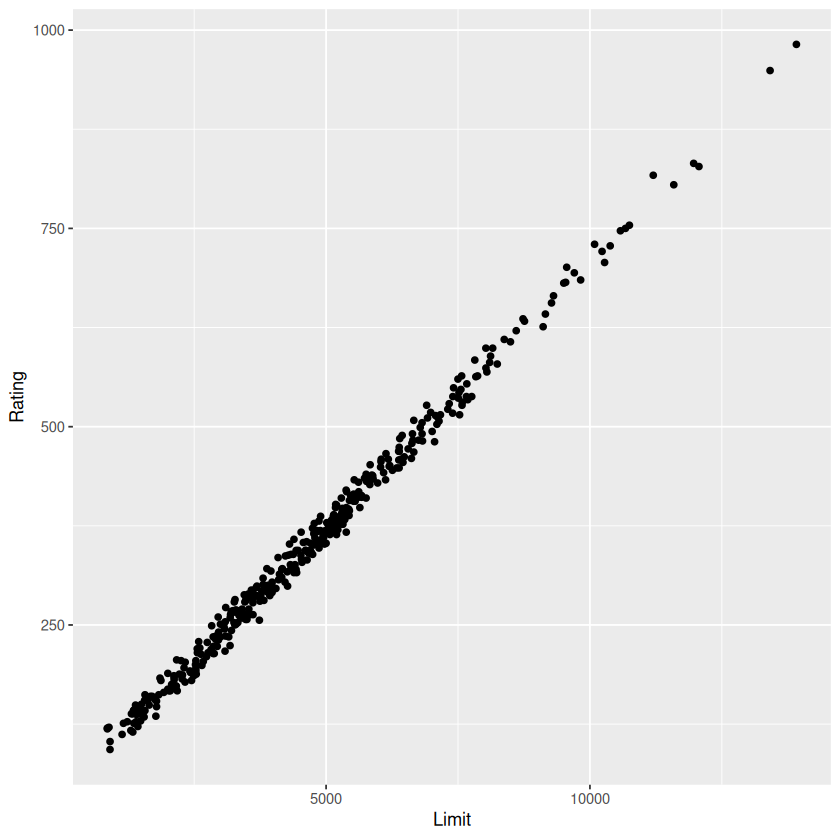

In [11]:
ggplot(Credit, aes(x = Limit, y = Rating)) +
    geom_point()

# the 2 vars are almost perfectly linear to each other
# one will not contribute much when the other is present
# keep only one, so delete limit
# (as rating and balance have a slightly higher corr)

Credit$Limit <- NULL

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


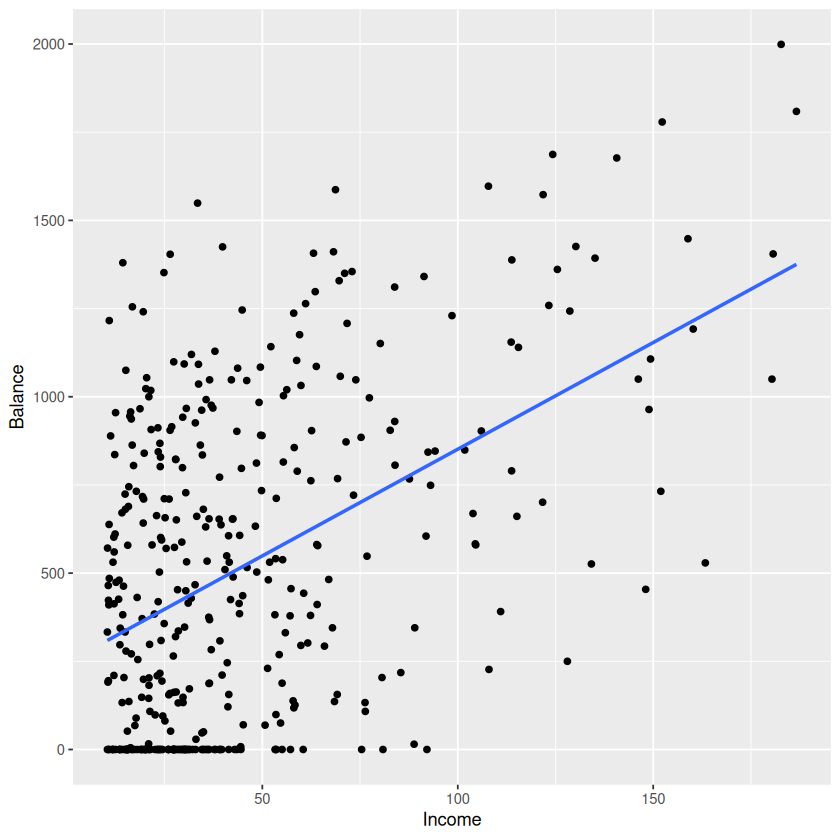

`geom_smooth()` using formula = 'y ~ x'


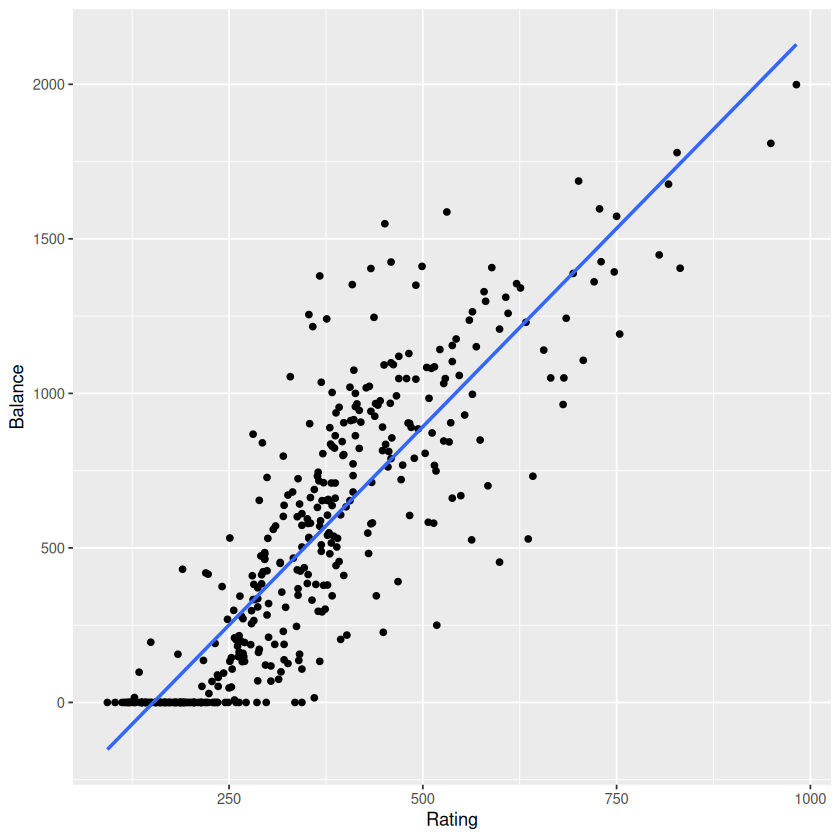

`geom_smooth()` using formula = 'y ~ x'


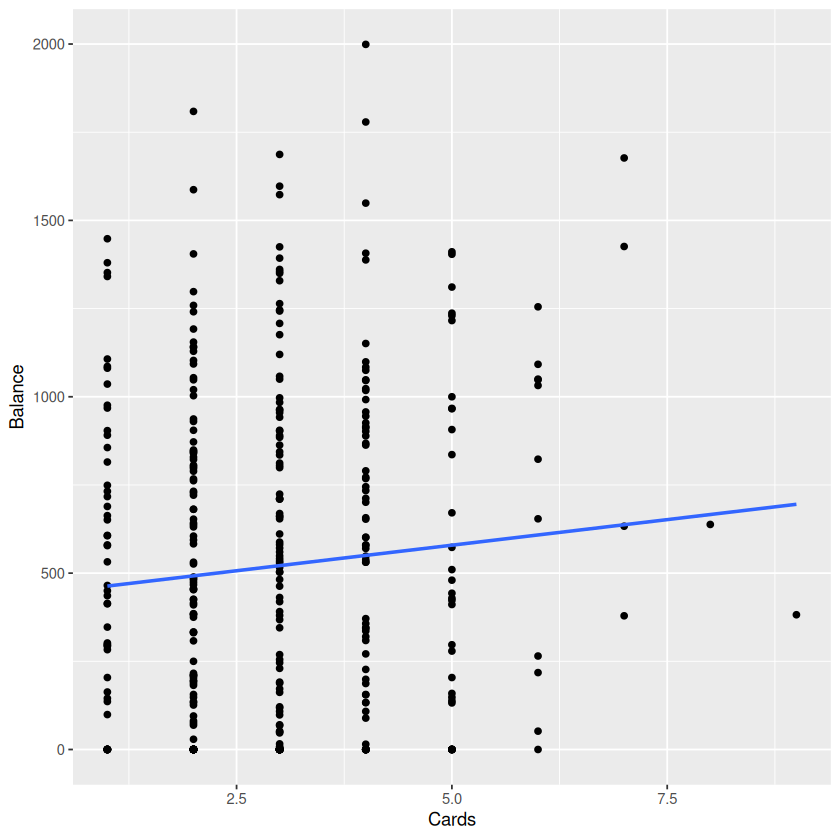

`geom_smooth()` using formula = 'y ~ x'


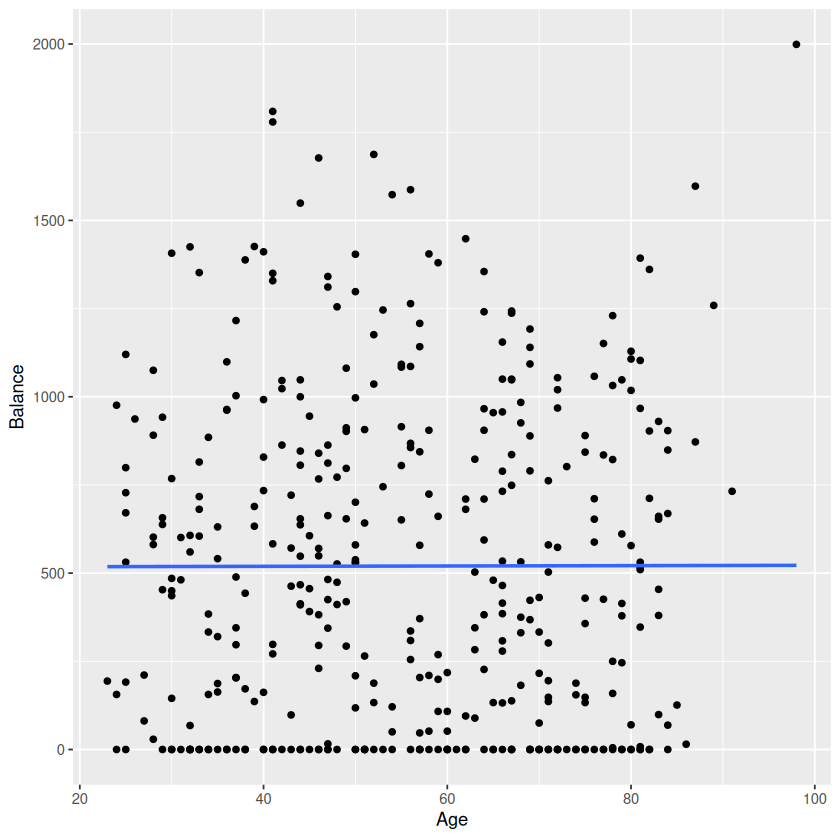

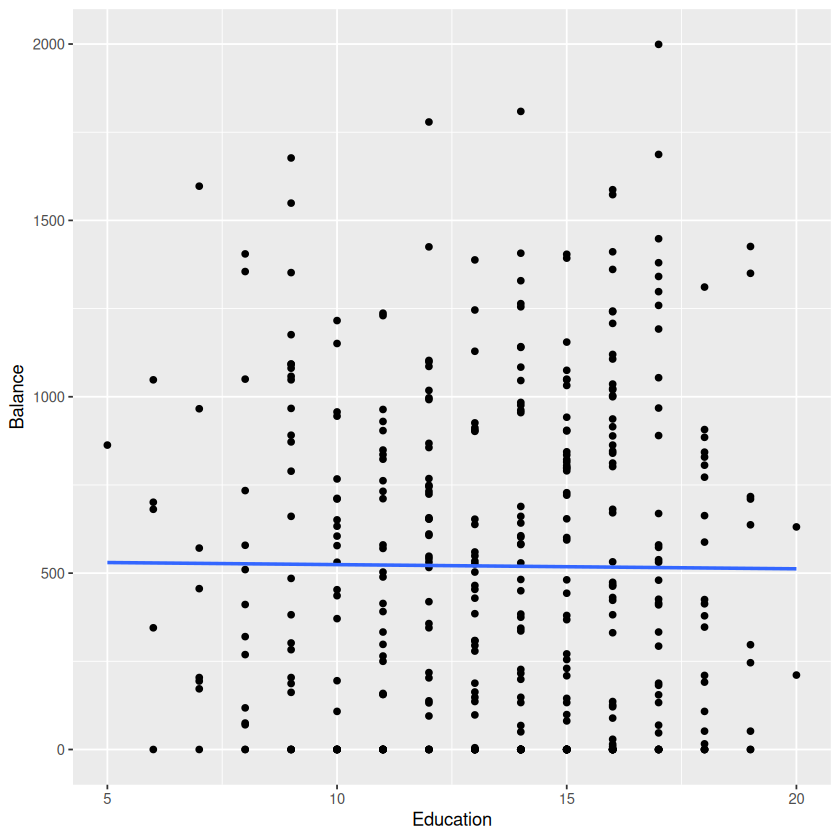

In [12]:
# Visual representations
vars.numeric <- colnames(Credit[, 1:5])
for (i in vars.numeric) {
    plot <- ggplot(Credit, aes(x = Credit[, i], y = Balance)) +
        geom_point() +
        geom_smooth(method = "lm", se = FALSE) + labs(x = i)
    print(plot)
}

In [19]:
# Task 3: Explore factor variables
# Investigate distribution of factor vars. ID a factor var likely
# to predict the target. For this factor:
# a - show key descriptive stats
# b - create visual representations
# c - explain why you selected this variable and how the variable
# -- relates to the target

library(tidyverse)
vars.categorical <- c("Gender", "Student", "Married", "Ethnicity")
for (i in vars.categorical) {
    x <- Credit %>%
        group_by_(i) %>%
        summarize(
            mean = mean(Balance),
            median = median(Balance),
            n = n()
        )
    print(x)
}

# Only student stands out as making a significant difference
# b/t its 2 levels yes and no

Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help”


# A tibble: 2 × 4
  Gender    mean median     n
  <fct>    <dbl>  <int> <int>
1 " Male"   510.    463   193
2 "Female"  530.    456   207


Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help”


# A tibble: 2 × 4
  Student  mean median     n
  <fct>   <dbl>  <dbl> <int>
1 No       480.    424   360
2 Yes      877.    953    40


Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help”


# A tibble: 2 × 4
  Married  mean median     n
  <fct>   <dbl>  <int> <int>
1 No       523.    467   155
2 Yes      518.    454   245


Warning message:
“`group_by_()` was deprecated in dplyr 0.7.0.
ℹ Please use `group_by()` instead.
ℹ See vignette('programming') for more help”


# A tibble: 3 × 4
  Ethnicity         mean median     n
  <fct>            <dbl>  <dbl> <int>
1 African American  531     480    99
2 Asian             512.    414   102
3 Caucasian         518.    465   199


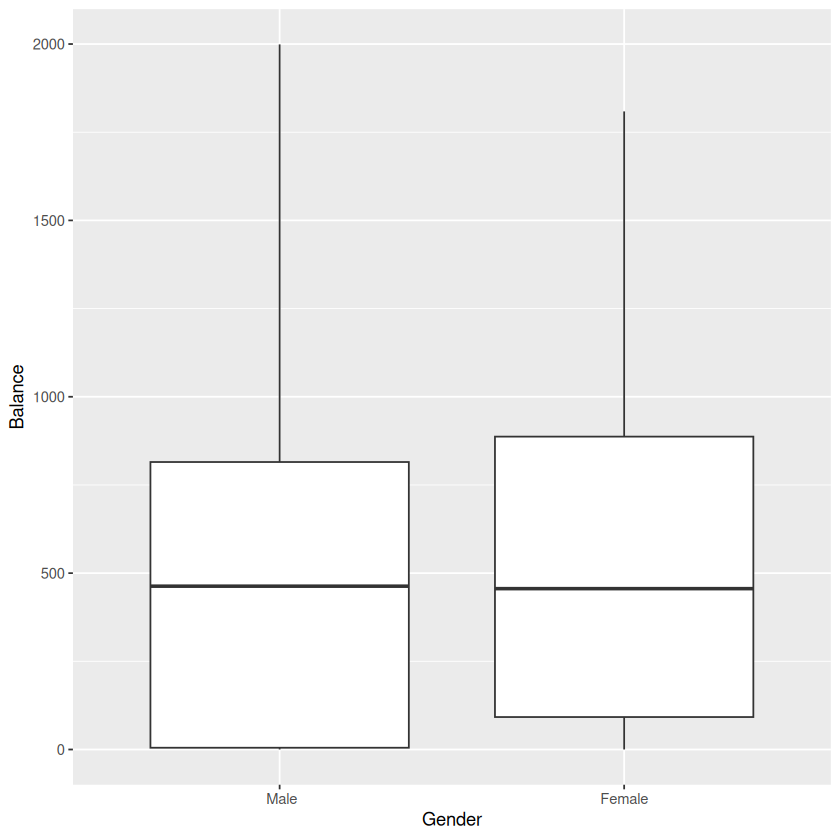

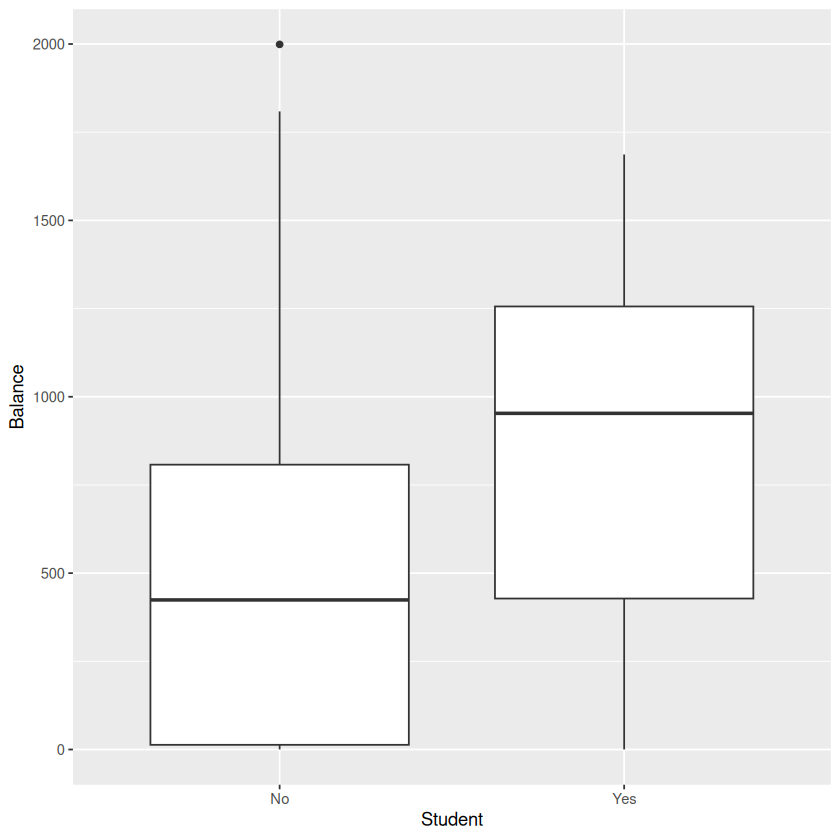

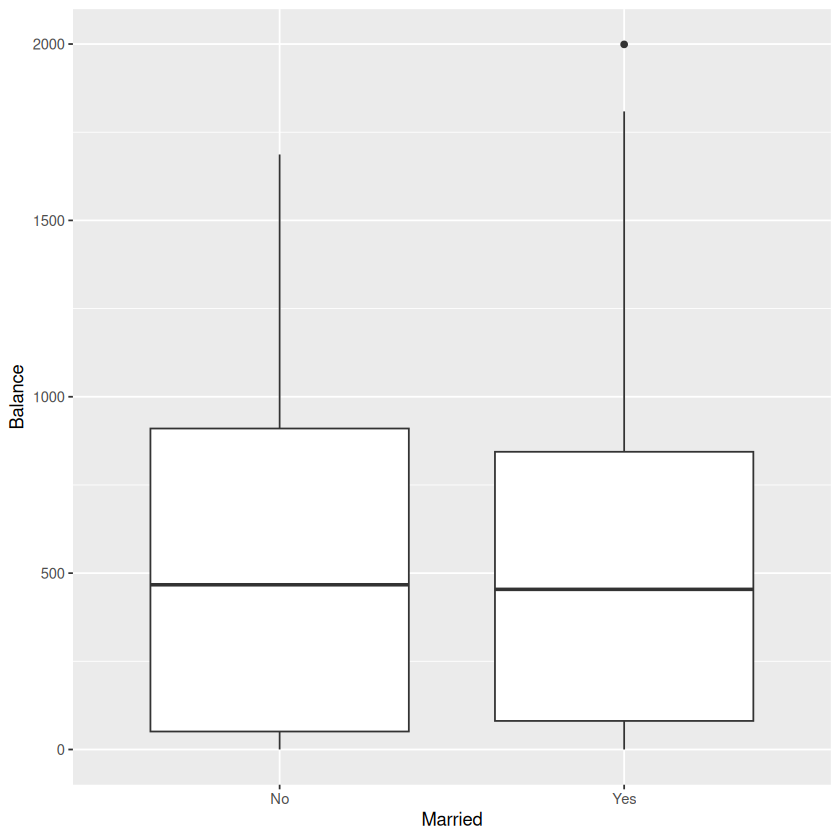

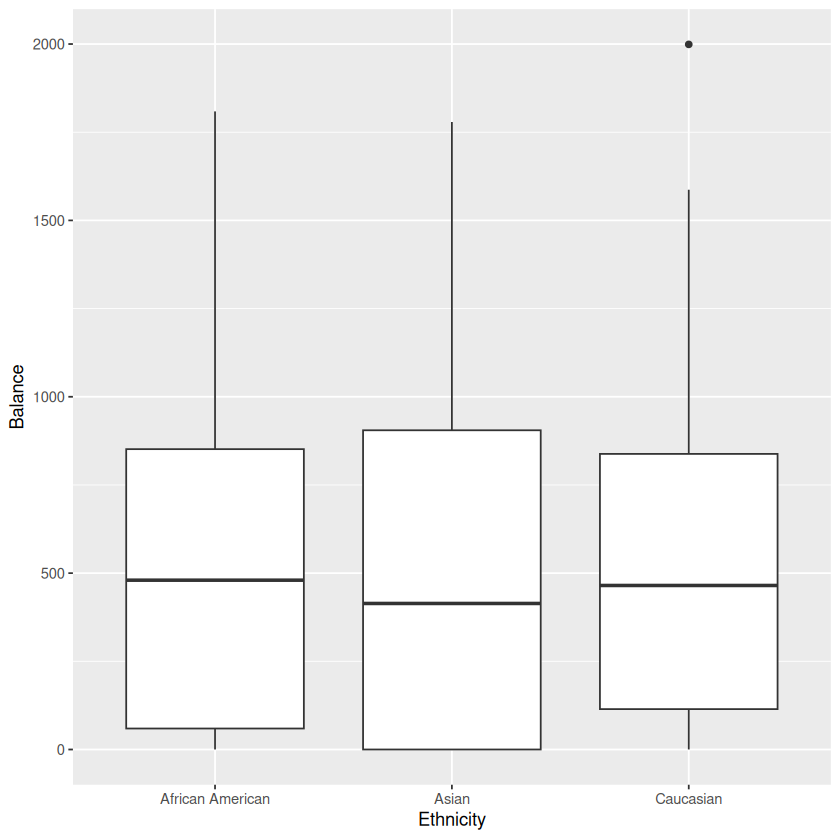

In [20]:
# Visualize with split boxplots
for(i in vars.categorical) {
    plot <- ggplot(Credit, aes(x = Credit[, i], y = Balance)) +
        geom_boxplot() +
        labs(x = i)
    print(plot)
}